<a href="https://colab.research.google.com/github/jhportfolio1/MsAiSchool10_StatisticalData/blob/main/DATA03_%EA%B0%80%EC%84%A4%EA%B2%80%EC%A0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 가설 검정 개념이해
- 어떤 가설이 옳은지/틀렸는지 검증하는 과정
- 데이터를 수집하고 분석하여 추론하는 과정에서 사용

>## 1) 귀무가설
- '검증하려는 주장이 틀렸다'는 것을 입증하기 위해 세우는 가설
- 어떤 인과관계나 차이가 존재하지 않는 다는 가정
- 연구자가 반드시 입증해야 하는 가설로 이를 기각하는 것이 주요 목표
- 유의수준(significance level) : 0.05~0.01로 설정함
- 결과가 1~5% 이하일때 기각한다는 의미
- p-value와 함께 고려함

>## 2) 대립가설
- 연구자가 검증하고자 하는 가설
- 대립가설은 실험결과에 영향을 주는 요인이 있다는 가설 / 귀무가설 기각시 채택
- 양측성 : 두가지 결과 중 하나가 발생할 수 있는 경우
- 단측성 : 한 방향으로만 결과가 나오는 경우

>## 3) 일원 분산 분석(One-way ANOVA)
- 일원분산분석 : 1개 독립 변수로 종속변수의 평균에 차이가 있는지 검정함
- 종속변수 : 수치형데이터 / 정규형분포 따르는 것이 좋음
- 여러개 그룹 비교할 때 유용한 방법
- F-통계량 사용하여 검정
- 각 그룹의 샘플 수 비슷한지 확인하고 정규성 검정하는 것이 좋음

>## 4) 이원 분산 분석(Two-way ANOVA)
- 이원분산분석 : 두가지 요인(factor)에 따른 평균값의 차이를 비교하는 방법
- 각 요인은 두개 이상의 수준을 가질 수 있음
- F-검정 사용
- 다중변수간 영향파악
- 상호작용 효과파악
- 분석의 정확도향상

# 2. 검정 방법

>## 1) t- 검정
- 모집단의 분산/표준편차 추정할 수 없을때 경우에 사용 
- 표준편차 이용하여 검정 수행
- 표본의 크기가 작을 때 유용

>## 2) z- 검정
- 모집단의 분산/표준편차 알 수 있을때 사용
- 표본 크기 작아도 사용가능 / 대부분 표본 30이상일때 적용

>## 3) 검정 통계량
- 가설 검정에 사용되는 통계량으로 표본 데이터에서 계산
- 표본데이터의 평균/분산/비율 등을 이용하여 계산
- 가설 검정 결과 판단하는 기준

>## 4) F-통계량
- 각 그룹의 평균값들의 분산과 그룹 내 오차의 분산 비율로 계산
- F-통계량 클수록 각 그룹 평균값 차이가 큼
- 일원분산분석의 검정방법

>## 5) 카이제곱(chi-squre) 검정
- 관측값과 기대값 간의 차이가 우연인지 유읨미한 것인지 검정함
- 분류 및 범주형 변수간 관계 파악시 사용
- 귀무가설, 대립가설의 검정방법 중 하나

>## 6) 교호작용 효과
- 여러 변수간의 조합이 종속변수에 영향 미치는 것 

# 3. 가설 검정 실습

>## 1) 귀무가설 실습
- 타이타닉 데이터 이용
- 귀무가설 : 타이타닉 호에 탑승한 남성 승객들의 생존율과 여성 승객의 생존율을 같다
- 검정 방법 : t-검정
- 유의 수준 : 0.05

In [3]:
import pandas as pd
from scipy import stats

#데이터 불러오기
titanic_df = pd.read_csv('Titanic_data.csv')


#남성승객, 여성승객 생존 여부에 따른 데이터프레임 생성
male_df = titanic_df[titanic_df['Sex'] == 'male']
female_df = titanic_df[titanic_df['Sex'] == 'female']

print(male_df)
print(female_df)


#각 데이터프레임의 생존여부 평균 계산
male_survival_rate = male_df['Survived'].mean()
female_survival_rate = female_df['Survived'].mean()

print(male_survival_rate)
print(female_survival_rate)


#t-검정 수행
t, p = stats.ttest_ind(male_df['Survived'], female_df['Survived'])

#유의수준과 비교하여 귀무가설 기각 여부 결정
alpha = 0.05
if p < alpha:
  print(f"p-value: {p:.4f}, 귀무가설 기각")
else:
  print(f"p-value: {p:.4f}, 귀무가설 채택")

     PassengerId  Survived  Pclass                            Name   Sex  \
0              1         0       3         Braund, Mr. Owen Harris  male   
4              5         0       3        Allen, Mr. William Henry  male   
5              6         0       3                Moran, Mr. James  male   
6              7         0       1         McCarthy, Mr. Timothy J  male   
7              8         0       3  Palsson, Master. Gosta Leonard  male   
..           ...       ...     ...                             ...   ...   
883          884         0       2   Banfield, Mr. Frederick James  male   
884          885         0       3          Sutehall, Mr. Henry Jr  male   
886          887         0       2           Montvila, Rev. Juozas  male   
889          890         1       1           Behr, Mr. Karl Howell  male   
890          891         0       3             Dooley, Mr. Patrick  male   

      Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0    22.0      1   

>## 2) 일원분산분석
- 하나의 독립변수가 종속변수에 미치는 영향 분석
- A, B, C : 3가지 생산방법
- 30개의 샘플
- 샘플점수 : 1~5점 사이



In [10]:
import pandas as pd
import numpy as np 

#가상의 데이터셋 생성
np.random.seed(1)
data = {
    'A': np.random.randint(1,6,10),
    'B': np.random.randint(1,6,10),
    'C': np.random.randint(1,6,10)
}
df = pd.DataFrame(data)
print(df)

   A  B  C
0  4  2  5
1  5  3  2
2  1  5  2
3  2  3  1
4  4  5  2
5  1  4  2
6  1  5  2
7  2  3  2
8  5  5  1
9  5  3  5


In [11]:
from scipy.stats import f_oneway

#일원 분산 분석 수행
f_stat, p_val = f_oneway(df['A'],df['B'],df['C'])
print('One-way ANOVA')
print('==============')
print(f'F-statistic: {f_stat:.4f}')
print(f'p-value: {p_val:.4f}')

alpha = 0.05
if p_val < alpha:
  print("귀무 가설 기각")
else:
  print("귀무 가설 채택")

One-way ANOVA
F-statistic: 2.2966
p-value: 0.1199
귀무 가설 채택


>## 3) 카이제곱(chi-squre) 검정
- 성별과 흡연 간의 상관관계 분석


In [7]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

#가상 데이터 생성
data = {
    'Gender': ['M','M','M','M','F','F','F','F'],
    'Smoker': ['yes','no','no','yes','yes','yes','no','no'],
    'Count': ['20','80','40','60','40','160','80','120']
}
df = pd.DataFrame(data)

#데이터프레임을 이용한 분할표 생성
table = pd.pivot_table(df, values='Count', index='Gender', columns='Smoker')

#chi-squre 검정 실행
stat, p, dof, expected = chi2_contingency(table)
alpha = 0.05

#유의 수준과 p-value 비교 후 귀무 가설 기각 여부 결정
if p < alpha:
  print(f"p-value: {p:.4f}, 귀무 가설 기각")
else:
  print(f"p-value: {p:.4f}, 귀무 가설 채택")

p-value: 0.0000, 귀무 가설 기각


>## 4) 이원분산분석
- 성별과 객실 클래스가 생존여부에 미치는 영향

In [ ]:
#프로그램 설치
!pip install statsmodels

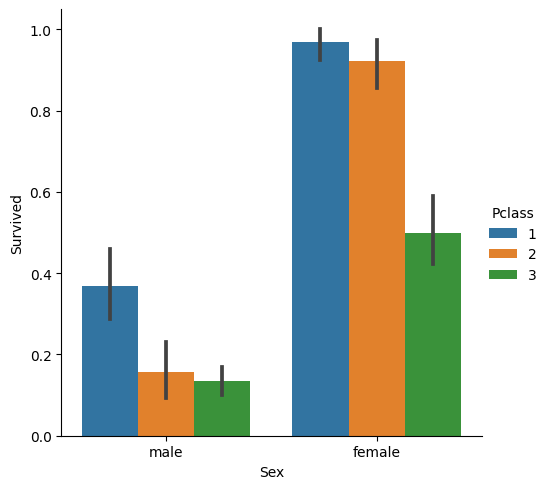

In [21]:
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

#데이터 불러오기
titanic_df = pd.read_csv('Titanic_data.csv')

#이원분산분석 모델 생성
model = ols('Survived ~ C(Sex) + C(Pclass) + C(Sex):C(Pclass)', titanic_df).fit()

#분산분석 실행
anova_results = anova_lm(model, typ=2)

#시각화
sns.catplot(x='Sex', y='Survived', hue='Pclass', data=titanic_df, kind='bar')

>## 5) 교호작용 효과
- 성별과 객실등급(Pclass)가 생존 여부에 미치는 영향



     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

Text(0.5, 1.0, 'Survival Rate by Sex and Pclass')

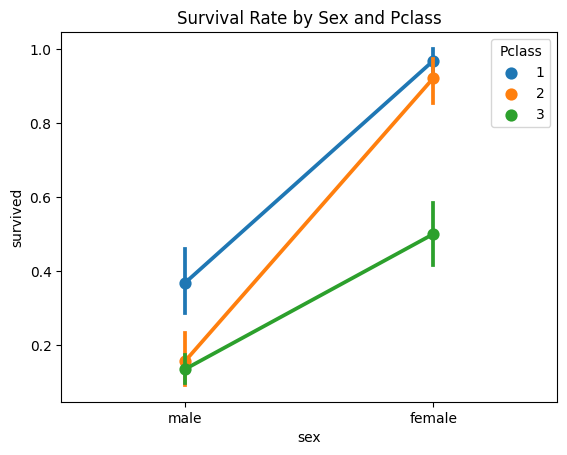

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

#데이터셋 불러오기
titanic = sns.load_dataset('titanic')
print(titanic)

#종속변수, 독립변수 지정
sns.pointplot(x='sex', y='survived', hue='pclass', data=titanic)

#legend 추가
plt.legend(title='Pclass', loc='best')

#제목추가
plt.title('Survival Rate by Sex and Pclass')

In [ ]:
#